#### 🚗 Used Car Data Analysis 

##### PHASE 1 : 🧠 Data Understanding

**🔍 Observation** 

- Data Structure
- Dataset Dimensions (Shape)
- Missing Data
- Variable Types  

Import the pandas library for structured data manipulation using DataFrames

In [1]:
import pandas as pd

Load the dataset from a CSV file and store it in the variable 'df'

In [ ]:
df = pd.read_csv("used_cars.csv")

Display the first 5 rows to inspect the structure and content for the dataset

In [ ]:
df.head()

Check the shape of the dataset (number of rows and columns)

In [ ]:
df.shape

(426880, 26)

Display the data types of each column and check for any missing (null) values

In [ ]:
df.info()

Count the number of missing values in each column

In [ ]:
df.isnull().sum()

**📌 Observation Summary**

- The dataset contains 426,880 rows and 26 columns
- Columns with missing values include: `year` , `manufacturer` , `model` , `condition` ,..., `county` , `lat` , `long` , `posting_date`
- The dataset consists of both numerical and categorical features
- The initial data quality is relatively good and ready for the data cleaning phase

##### PHASE 2 : 🧹 Data Cleaning & Preprocessing

**🔍 Observation** 

- Inspect and handle **Missing Values** and **Outliers**
- Put or drop missing data where appropriate
- Clean **text and categorical data**
- Transform data into a structure suitable for analysis

Check which columns have the most missing values

In [ ]:
df.isnull().sum().sort_values(ascending=False)

county          426880
size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
lat               6549
long              6549
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
description         70
posting_date        68
image_url           68
region_url           0
url                  0
id                   0
region               0
price                0
state                0
dtype: int64

**Handling Missing Values**
Since multiple columns have missing values and some of them contain a large proportion of missing data, we follow these structured steps:

1. Calculate the **percentage of missing values** per column 
2. Drop columns with more than 50% missing or those irrelevant to the analysis
3. Impute numerical columns using mean or median
4. Impute categorical columns using a placeholder like "Unknown"

In [ ]:
# 1. Calculate the % of missing values per column

missing = df.isnull().sum()
missing_percent = (missing/len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Missing %': missing_percent})
missing_df = missing_df[missing_df['Missing'] > 0].sort_values(by='Missing %', ascending=False)
print(missing_df)


              Missing   Missing %
county         426880  100.000000
size           306361   71.767476
cylinders      177678   41.622470
condition      174104   40.785232
VIN            161042   37.725356
drive          130567   30.586347
paint_color    130203   30.501078
type            92858   21.752717
manufacturer    17646    4.133714
title_status     8242    1.930753
long             6549    1.534155
lat              6549    1.534155
model            5277    1.236179
odometer         4400    1.030735
fuel             3013    0.705819
transmission     2556    0.598763
year             1205    0.282281
description        70    0.016398
image_url          68    0.015930
posting_date       68    0.015930


In [ ]:
# 2. Drop columns with missing > 50% and irrelevant to the analysis

df = df.drop(['county','size','VIN','description','posting_date','image_url'],axis=1)

# 3. Impute missing numberic values using median / mean

df['odometer'] = df['odometer'].fillna(df['odometer'].median())
df['year'] = df['year'].fillna(df['year'].median())
df['lat'] = df['lat'].fillna(df['lat'].mean())
df['long'] = df['long'].fillna(df['long'].mean())

# 4. Impute missing categorical values using 'Unknown'

fill_unknown_cols = ['cylinders','condition','drive','paint_color','type','manufacturer','title_status','model','fuel','transmission']
df[fill_unknown_cols] = df[fill_unknown_cols].fillna('Unknown')

#1 check overall data types

#2 Convert data types for specific columns to appropriate types (e.g., float -> int)

In [ ]:
#1
df.dtypes 

#2
df['year'] = df['year'].astype('int64')
df['odometer'] = df['odometer'].astype('int64')

**Outlier Dectection & Removal using IQR (Interquartile Range)**
Steps followed to detect and removal outlier:

1. Import visualization libraries (e.g., seaborn, matplotlib)
2. Create a function to identify and remove outliers
3. Plot **boxplots** to visually check for outliers
4. Calculate the **IQR** to determine outlier thresholds
5. Remove rows considered outliers / display how many rows were removed / export the new dataframe without outliers to analystic
6. Apply to multiple columns

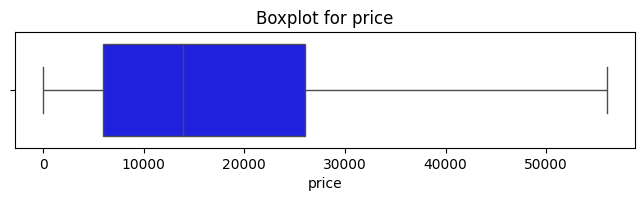

price: ลบออก 0 rows ที่เป็น outliers



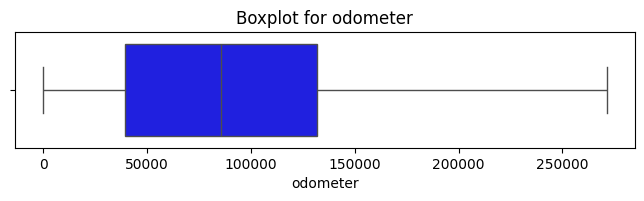

odometer: ลบออก 0 rows ที่เป็น outliers



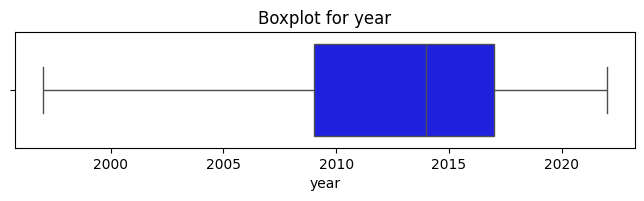

year: ลบออก 0 rows ที่เป็น outliers



In [ ]:
# 1. Import visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

# 2. Create outlier removal funciton

def remove_outliers_iqr(df,column):

    # 3. Show boxplot for visual inspection
    
    plt.figure(figsize=(8,1.5))
    sns.boxplot(x=df[column], color='blue')
    plt.title(f'Boxplot for {column}')
    plt.show()

    # 4. Calculate IQR

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1

    # 5. Remove rows considered outliers / display how many rows were removed / export the new dataframe without outliers to analystic

    df_cleaned = df[~((df[column] < (Q1-1.5*IQR))|(df[column] > (Q3+1.5*IQR)))]

    print(f"{column}: delete {len(df)-len(df_cleaned)} outliers rows\n")

    return df_cleaned

# 6. Apply to 3 columns

for col in ['price','odometer','year']:
    df = remove_outliers_iqr(df, col)

# REPEAT UNTIL OUTLIERS ARE REMOVED

**Text Cleaning (Object/Categorical Columns)**

1. Identify relevant object-type columns for cleaning
2. Apply `.str.lower()` to convert to lowercase and `.str.strip()` to remove whitespace
3. Verify that cleaning was successful

In [ ]:
# 1. Define object-type columns for cleaning

columns_to_clean = ['manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','type','paint_color','region','state']

# 2. Apply string cleaning (lowercase & Whitespace)

for col in columns_to_clean:
    df[col] = df[col].astype(str).str.lower().str.strip()

# 3. Verify cleaned values

df['manufacturer'].value_counts()

Save the cleaned and processed dataset for the next steps of analysis

In [ ]:
df.to_csv("cleaned_used_cars.csv",index=False)
print("cleaned_used_cars.csv has been saved ✅")

**📌 Observation Summary**  

- Missing values handled using a mix of iumputation (mean/median/"Unknown") and column removal
- Outlier in `price` , `odometer` and `year` removed using the IQR method
- Convert `year` and `odometer` columns from **float to int**
- Cleaned text in 12 columns
- Final dataset contains **396,308 rows** with no missing values or outliers, ready for analysis

##### PHASE 3 : 📊 Exploratory Data Analysis (EDA)

**🔍 Observation** 

- Conducted initial exploratory data analysis (EDA)
- Identified key patterns and data-driven insights
- Prepared data for subsequent **SQL queries and dashboard development**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Graph Setup
sns.set(style = "whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# Load dataset (cleaned dataset)
df = pd.read_csv("cleaned_used_cars.csv")

**1. Distribution of Car Prices**

<function matplotlib.pyplot.show(close=None, block=None)>

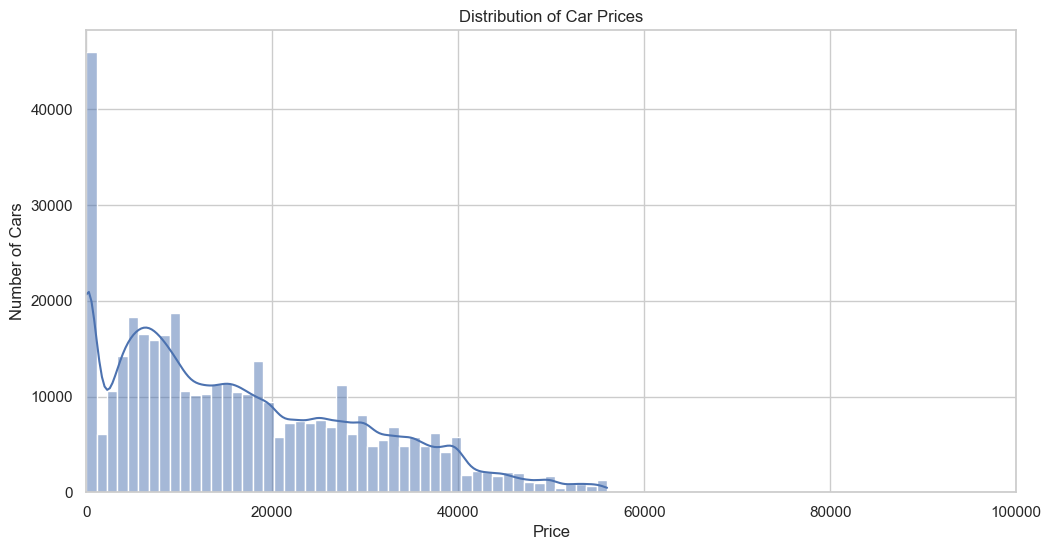

In [2]:
sns.histplot(df['price'],bins=50,kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Number of Cars")
plt.xlim(0,100000)
plt.show

- Variables: `price`
- Analysis Type: Distribution of numberical variable
- Observation: Price is heavily right-skewed with most listings below $20,000
- Insight: The second-hand car market is dominated by low-cost vehicles, likely reflecting consumer demand and affordability trends

**2. Price vs Year**

<function matplotlib.pyplot.show(close=None, block=None)>

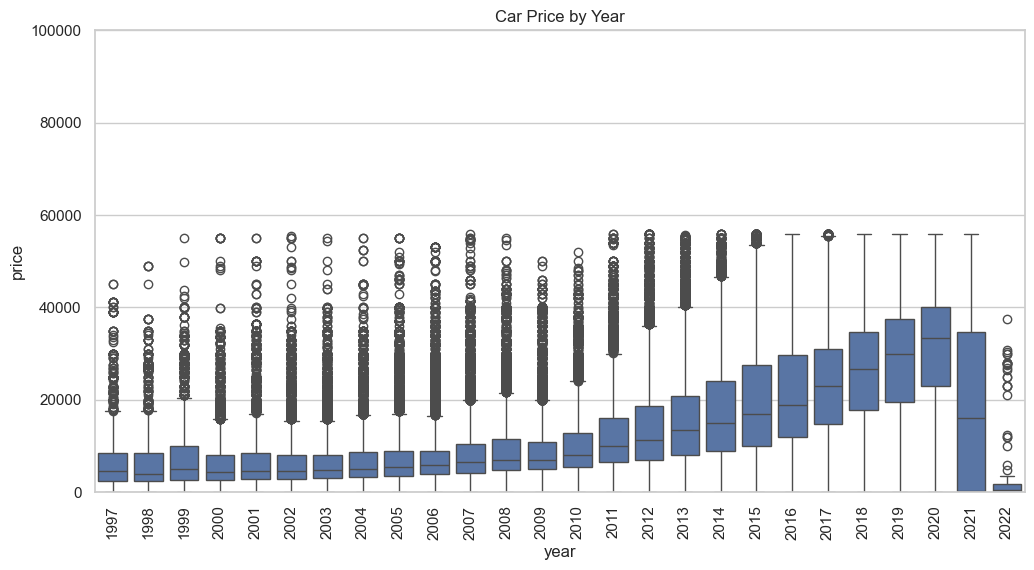

In [5]:
sns.boxplot(x='year',y='price',data=df)
plt.xticks(rotation=90)
plt.title("Car Price by Year")
plt.ylim(0 , 100000)
plt.show

- Variables: `year` , `price`
- Analysis Type: Bivariate numberical comparison
- Observation: Newer vehicles (especially post-2020) are priced higher, while older cars drop significantly in price
- Insight: Strong negative correlation between vehicle age and price, useful as a feature in machine learning models (e.g., vehicle age = current year - manufacture year)

**3. Price vs Manufacturer**

<function matplotlib.pyplot.show(close=None, block=None)>

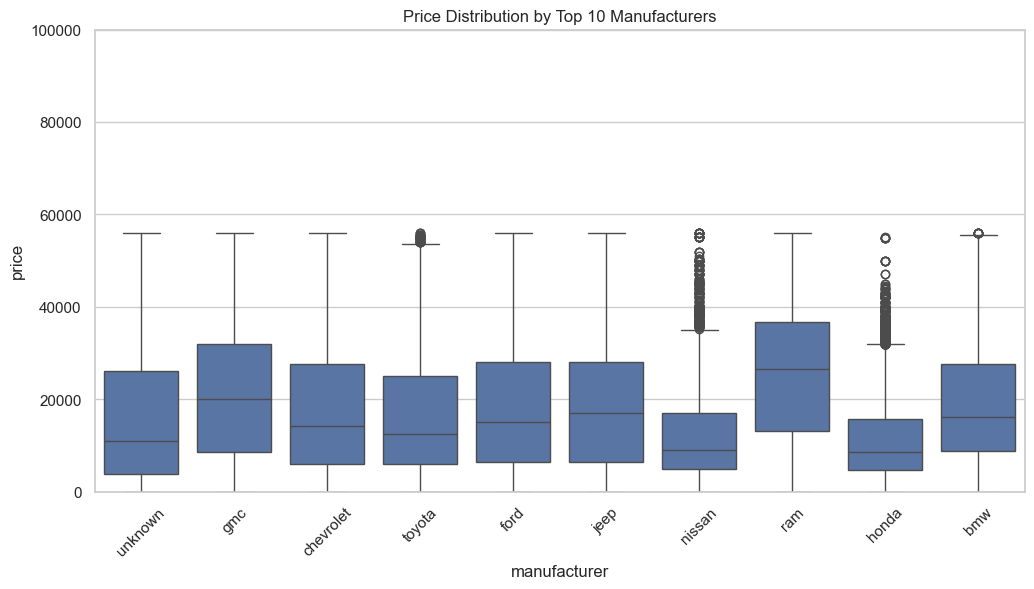

In [7]:
top_manufacturer = df['manufacturer'].value_counts().nlargest(10).index
sns.boxplot(x='manufacturer',y='price',data=df[df['manufacturer'].isin(top_manufacturer)])
plt.xticks(rotation=45)
plt.title("Price Distribution by Top 10 Manufacturers")
plt.ylim(0 , 100000)
plt.show

- Variables: `manufacturer` , `price`
- Analysis Type: Grouped boxplot analysis
- Observation: RAM-branded vehicles show the widest price range and the highest median price
- Insight: Manufacturer significantly impacts price. Segmenting by luxury vs non-luxuru brands may enhance further analysis

**4. Odometer vs Price**

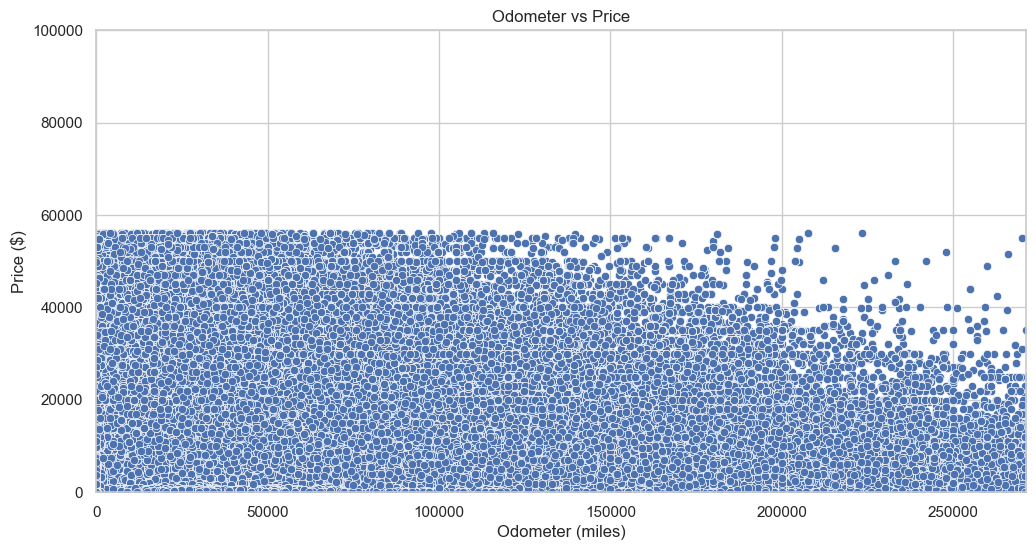

In [4]:
sns.scatterplot(x='odometer',y='price',data=df)
plt.title("Odometer vs Price")
plt.xlim(0 , df['odometer'].max())
plt.ylim(0 , 100000)
plt.xlabel("Odometer (miles)")
plt.ylabel("Price ($)")
plt.show()

- Variable: `odometer` , `price`
- Analysis Type: Numerical correlation
- Observation: Price decreases as mileage increases
- Insight: High-mileage cars tend to be cheaper, comfirming a strong inverse relationship, often used as a key pricing factor

**5. Average Price by Fuel**

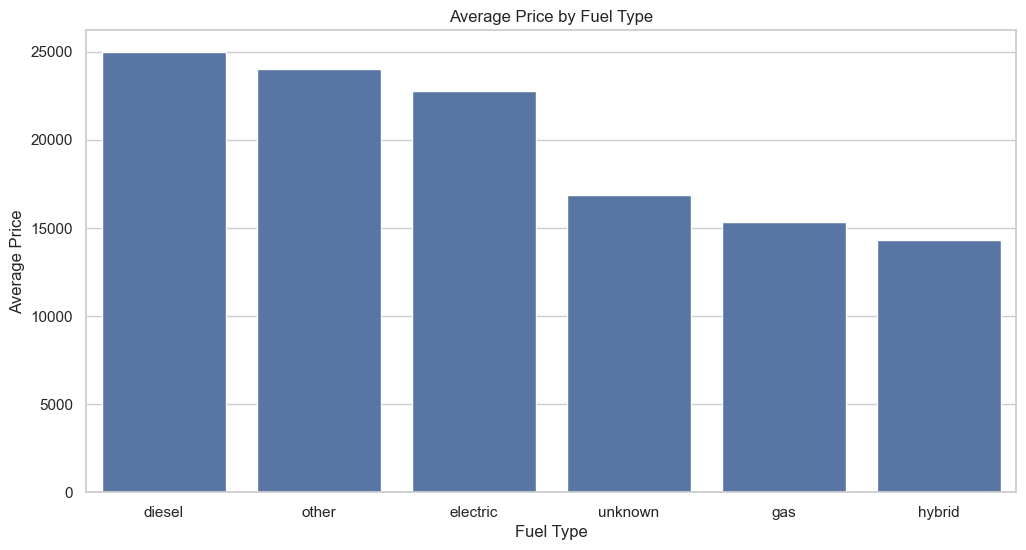

In [5]:
fuel_price = df.groupby('fuel')['price'].mean().sort_values(ascending=False)
sns.barplot(x=fuel_price.index, y=fuel_price.values)
plt.title("Average Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.show()

- Variables: `fuel` , `price`
- Analysis Type: Group-wise average price comparison
- Observation: Diesel vehicles have the highest average price while hybrids are the lowest
- Insight: Fuel type influences vehicle pricing, diesel retains higher value, while alternative energy vehicles may still be maturing in the market

**6. Transmission Type Distribution**

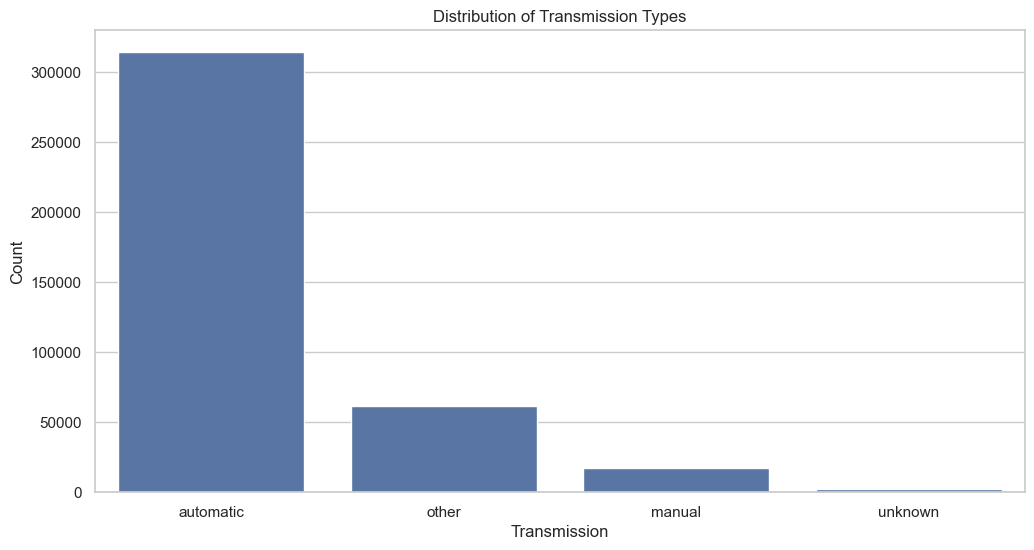

In [7]:
sns.countplot(x='transmission', data=df, order=df['transmission'].value_counts().index)
plt.title("Distribution of Transmission Types")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.show()

- Variables: `transmission`
- Analysis Type: Frequency count of categorical variable
- Observation: Automatic transmissions dominate the dataset
- Insight: Market preference leans strongly toward automatic vehicles, reflecting broader consumer behavior or availability

**7. Condition vs Price**

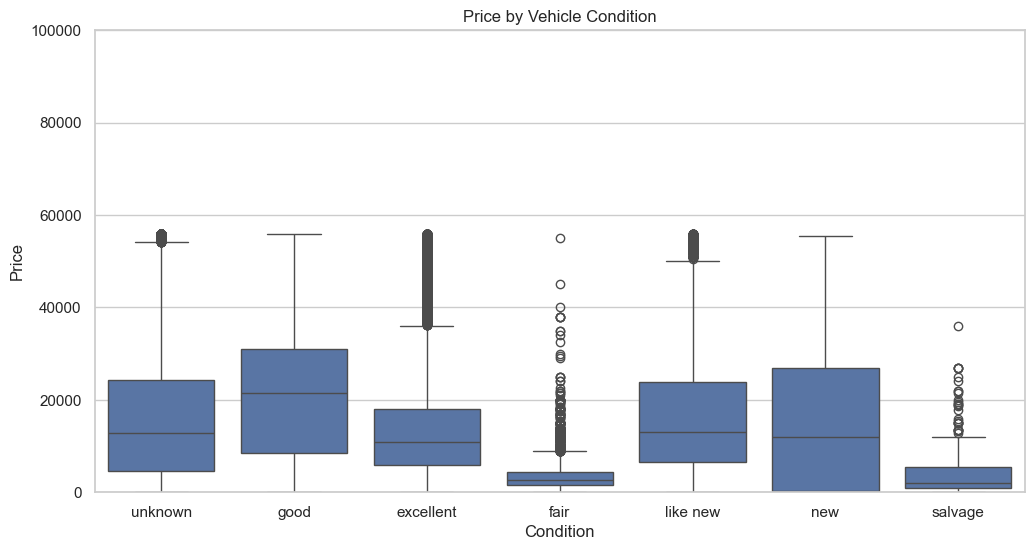

In [8]:
sns.boxplot(x='condition',y='price',data=df)
plt.title("Price by Vehicle Condition")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.ylim(0 , 100000)
plt.show()

- Variables: `condition` , `price`
- Analysis Type: Condition-based price comparison
- Observation: Vehicles in "new" or "good" condition are priced significantly higher than those labeled "fair" or "salvage"
- Insight: Vehicle condition is a string price driver, suitable for predictive fearures or dashboard filters

**📌 Observation Summary**

- **Key price drivers:** Year, condition, mileage and manudacturer
- Newer, low-mileage cars in good condition command higher prices
- **RAM and GMC** tend to more expensive
- **Fuel type also matters**, diesel and other fuels are priced higher than hybrids
- **Automatic transmissions** are the most common in the used car market

##### PHASE 4 : 💾 SQL Data Analysis

**🔍 Observation** 
- Performed SQL skill testing by converting the dataset into a **SQLite database**
- Queried key **business insights using SQL**, such as average selling price by brand and most common car types
- Summarized fidings to be used in a final **dashboard**

In [ ]:
import sqlite3
import pandas as pd

# Load Dataset
df = pd.read_csv("cleaned_used_cars.csv")

# Connect SQLite and turn DataFrame to Table
conn = sqlite3.connect("used_cars.db")
df.to_sql("used_cars", conn, if_exists="replace", index=False)

396308

- Loaded `cleaned_used_cars.csv` into a DataFrame for analysis
- Create a local SQLite database named `used_cars.db`
- Saved the DataFrame into a SQL table named `used_cars` for querying

In [2]:
def run_query(query):
    return pd.read_sql_query(query, conn)

- Create function named `run_query()` for run SQL queries and return result as a DataFrame

**1. Average Price by Manufacturer**

Identify how average selling price varies by car brand

In [ ]:
query1 = """
SELECT manufacturer, ROUND(AVG(price), 2) AS avg_price, COUNT(*) as total_cars
FROM used_cars
WHERE manufacturer IS NOT NULL AND price > 0
GROUP BY manufacturer
ORDER BY avg_price DESC
"""
print("Average Price by Manufacturer")
display(run_query(query1))

Average Price by Manufacturer


,manufacturer,avg_price,total_cars
0,tesla,35778.76,753
1,alfa-romeo,29645.54,819
2,ram,28158.63,15018
3,aston-martin,27834.82,11
4,jaguar,27774.10,1785
5,porsche,27272.35,1065
6,rover,25127.66,1800
7,audi,23317.68,6932
8,gmc,23114.39,13752
9,infiniti,21004.57,4459


**2. Car Counts by Production Year**

Understand year distribution across the dataset

In [ ]:
query2 = """
SELECT year, COUNT(*) as total_cars
FROM used_cars
WHERE year IS NOT NULL
GROUP BY year
ORDER BY year 
"""
print("Number of Cars by Year")
display(run_query(query2))

Number of Cars by Year


,year,total_cars
0,1997,1577
1,1998,1856
2,1999,2874
3,2000,3304
4,2001,4231
5,2002,5348
6,2003,6867
7,2004,8687
8,2005,10269
9,2006,12432


**3. Average Price by Condition**

Analyze the impact of vehicle condition on pricing

In [ ]:
query3 = """
SELECT condition, ROUND(AVG(price), 2) AS avg_price, COUNT(*) as count
FROM used_cars
WHERE condition IS NOT NULL AND price > 0
GROUP BY condition
ORDER BY avg_price DESC
"""
print("Average Price by Condition")
display(run_query(query3))

Average Price by Condition


,condition,avg_price,count
0,good,21384.00,111419
1,new,19353.81,900
2,unknown,18211.55,139801
3,like new,17197.96,18561
4,excellent,14482.91,88406
5,salvage,4204.03,433
6,fair,3634.14,4460


**4. Most Common Fuel Types**

Determine the dominant fuel types in the dataset such as gas , diesel etc.

In [ ]:
query4 = """
SELECT fuel, COUNT(*) as total
FROM used_cars
GROUP BY fuel
ORDER BY total DESC
"""
print("Most Common Fuel Types")
display(run_query(query4))

Most Common Fuel Types


,fuel,total
0,gas,333811
1,other,29332
2,diesel,23521
3,hybrid,5098
4,unknown,2941
5,electric,1605


**5. Top 10 Most Expensive Cars**

Identify vehicles priced over $30,000 and analyze their attributes

In [ ]:
query5 = """
SELECT manufacturer, model, year, price
FROM used_cars
WHERE price > 30000
ORDER BY price DESC
LIMIT 10
"""
print("Top 10 Most Expensive Cars")
display(run_query(query5))

Top 10 Most Expensive Cars


,manufacturer,model,year,price
0,mercedes-benz,unknown,2015,56000
1,porsche,macan s,2018,56000
2,unknown,freightliner m2,2017,56000
3,mercedes-benz,unknown,2015,56000
4,unknown,freightliner m2,2017,56000
5,unknown,freightliner m2,2017,56000
6,unknown,freightliner m2,2014,56000
7,unknown,freightliner m2,2017,56000
8,ram,3500 mega cab,2018,56000
9,ford,f550 4x4 crew cab,2012,56000


Closed the SQLite connection after analysis to avoid lingering connections and ensure resource optimization

In [ ]:
conn.close()

**📌 Summary Observation** 

- **Premium brands** have the highest average selling prices
- **Newer models** are less common in the dataset but tend to have significantly higher prices
- Better condition equals higher value
- **Gasoline** is the most frequently used fuel type, followed by **diesel and then hybrid**
- Car priced **above $30,000** are reletively rare but easily identifiable based on their features

##### PHASE 5 : 📈 Dashboard

**🔍 Observation** 
- Create 5 key visualizations for data exploration and storytelling:
    - Distribution of Car Price
    - Average Price by Year
    - Top 10 Manufacturers by Count and Average Price
    - Vehicle Condition vs Price
    - Odometer vs Price
- Selected **Streamlit** for building the dashboard because:
    - It allows seamless intergration with existing Python/Jupyter code
    - It eliminates the need for data conversion
    - It helps visualize insights in a used-friendly and interactive format

In [2]:
# Import library 
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Graph
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)
df = pd.read_csv("cleaned_used_cars.csv") 

# Load Data
@st.cache_data
def load_data():
    df = pd.read_csv("cleaned_used_cars.csv")
    return df
df = load_data()

2025-06-07 03:49:49.435 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-06-07 03:49:49.436 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-06-07 03:49:49.436 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:49.917 
  command:

    streamlit run C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-07 03:49:49.918 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:49.919 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:50.421 Thread 'Thread-3': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:50.424 Thread 'Th

**Import library**
- Import essential libraries for **data manipulation, visualization and dashboard creation**

**Setup Graph**
- Applied consistent and visually appealing style across all plots for better readability

**Load Data**
- Loaded the cleaned dataset (`cleaned_used_cars.csv`)
- Used `@st.cache_data` decorator to **optimize performance** and **avoid redundant reloading** 

In [3]:
# Sidebar Filters

st.sidebar.title("Filter Options")

manufacturers = st.sidebar.multiselect(
    "Select Manufacturer(s):", options=sorted(df['manufacturer'].dropna().unique()), default=None
)

year = st.sidebar.slider(
    "Select Year Range:", int(df['year'].min()), int(df['year'].max()),
    (int(df['year'].min()), int(df['year'].max()))
)

# Fitler Data from Sidebar

filtered_df = df.copy()
if manufacturers:
    filtered_df = filtered_df[filtered_df['manufacturer'].isin(manufacturers)]
filtered_df = filtered_df[(filtered_df['year'] >= year[0]) & (filtered_df['year'] <= year[1])]

2025-06-07 03:49:51.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.249 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.250 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.250 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.251 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.251 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Sidebar Filters**
- Implemented interactive filters in the sidebar to allow users to:
    - Select **Manufacturer**
    - Filter by **Year Range**

**Fitler Data Based on User Input**
- Applied filters dynamically to update visualizations in real-time
    - For examples: Display only cars from **Toyota** between **2010-2020**

In [4]:
# Dashboard Header

st.title("Used Car Data Dashboard")
st.markdown("Explore the priceing trends and distribution of used cars in the market.")

2025-06-07 03:49:51.314 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.316 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

**Dashborad Header**
- Named the Dashboard and Description

In [5]:
# KPI Summary

col1, col2, col3 = st.columns(3)

col1.metric("Total Cars", f"{len(filtered_df):,}")
col2.metric("Average Price", f"${filtered_df['price'].mean():,.0f}")
col3.metric("Avg. Mileage", f"{filtered_df['odometer'].mean():,.0f} mi")

2025-06-07 03:49:51.327 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.328 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.329 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.330 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.330 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.331 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.333 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

**KPI Summary**
- Displayed key performance indicators (KPIs):
    - Total number of vehicles
    - Average selling price
    - Average mileage

In [6]:
# Price Distribution

st.subheader("Price Distribution")
fig1, ax1 = plt.subplots()
sns.histplot(filtered_df['price'], bins=50, kde=True, ax=ax1)
ax1.set_xlim(0, 100000)
st.pyplot(fig1)

# Average Price by Manufacturer

st.subheader("Average Price by Manufacturer")
avg_price_man = filtered_df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10)
fig2, ax2 = plt.subplots()
sns.barplot(x=avg_price_man.values, y=avg_price_man.index, ax=ax2)
ax2.set_xlabel("Average Price ($)")
st.pyplot(fig2)

# Price by Year

st.subheader("Price by Year")
fig3, ax3 = plt.subplots()
sns.boxplot(data=filtered_df, x='year', y='price', ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.set_ylim(0, 100000)
st.pyplot(fig3)

# Mileage vs Price

st.subheader("Mileage vs Price")
fig4, ax4 = plt.subplots()
sns.scatterplot(data=filtered_df, x='odometer', y='price', alpha=0.4, ax=ax4)
ax4.set_xlim(0, filtered_df['odometer'].max())
ax4.set_ylim(0, 100000)
st.pyplot(fig4)

2025-06-07 03:49:51.348 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:51.349 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:53.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:53.415 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:53.416 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:53.416 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:53.417 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 03:49:53.476 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

**Price Distribution**
- Used a histogram to show the distribution of car prices
- Limited x-axis to $100,000 to exclude extream outliers for clearer patterns

**Average Price by Manufacturer**
- Created a bar chart to compare the top 10 manufacturers by average selling price
- Sorted manufacturers by price from highest to lowest

**Price by Year**
- Plotted a boxplot to visualize price distributions over the years
- Rotated x-axis labels to prevent overlap and improve readability

**Mileage vs Price**
- Used a scatter plot to analyze the relationship between odometer(mileage) and price
- Set `alpha = 0.4` to reduce overplotting and enhance trend visibility

**📌 Summary Observation** 

- Key variables that influence car price include: year , manufacturer , fuel type , condition and odometer 
- Popular brands like Ford and Toyota show wide price ranges, while luxury brands remain expensive despite lower frequency
- Newer cars with lower mileage are priced significantly higher
- Electric and hybrid cars have higher average prices compared to traditional fuel types
- The dashboard enables interactive insights and allow users to dynamically explore trends with filters

#### 📝 Conclusion

##### 🔍Objective
This project aims to analyze used car collected from various sources across the United States. The goal is to uncover key insights,
such as the relationship between price and factors like production year, mileage and fuel type. and to build an interactive dashboard that enables users
to explore the data dynamically.

##### 🧩Key Findings
- **Ford and Chevrolet** are the most common manufacturers in the used car market.
- **Diesel-powered vehicles tend to have higher average prices** compared to gas-powered ones.
- **Price genarally decreases** as the **production year gets older** and **mileage increases** 
- **Pickup trucks and SUVs** have higher average prices than **sedans**
- **Luxury brands like BMW and Mercedes-Benz** tend to have higher average used car prices than mainstram brands
- Most used cars in the dataset were manufactured after 2010, indicating a relatively modern market invertory
- Vehicle condition significantly affects price. Car in excellent or like new condition are priced much higher than those in fair or salvage condition
- Gasoline is the dominant fuel type, though diesel vehicles command higher average prices

##### 📊Dashboard Features
- Interactive filters for selecting manufacturer(s) and production year range
- **KPI cards** displaying: total number of cars, average price and average mileage
- Visualizations including:
    - Price distribution
    - Average price by manufacturer
    - Price by production year
    - Mileage vs Price scatter plot

##### 💡Insights & Recommendation
- If you're looking for **durable used vehicles,** consider pickup truks or SUVs with diesel engines
- For sellers, be mindful that vehicle prices drop significantly as mileage increases
- For fleet operators, it is recommended to sell vehicles before they exceed 150,000 miles to better retain resale value, based on observed depreciation trends
- The most expensive used cars are typically luxury models from brands like Tesla and Mercedes-Benz

##### 🛠️Tools Used
- **Python**: `pandas`, `seaborn`, `matplotlib` for data wrangling and visualization
- **SQL**: `SQLite` for data querying insights
- **Streamlit**: for building the interactive web dashboard
- **Jupyter Notebook**: for exploratory data analysis and documentation

##### 📁Output Files
- `cleaned_used_cars.csv` – Cleaned dataset ready for analysis
- `streamlit_used_car_dashboard.py` – Streamlit dashboard application
- `Used_Car_Data_Analysis.ipynb` – Full data analysis workflow
- `used_cars.csv` – Raw dataset
- `used_cars.db` – SQLite database for SQL analysis